In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
grad = pd.read_csv('Admission_Predict.csv')

In [11]:
adm_pred = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [12]:
adm_pred.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [13]:
adm_pred.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


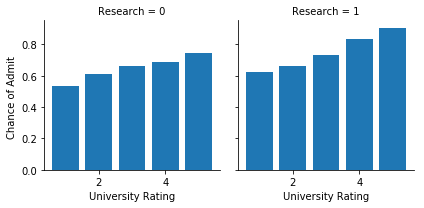

In [20]:
df = adm_pred.groupby(by = ['University Rating', 'Research'], as_index = False).mean()
sns.FacetGrid(df, col = 'Research').map(plt.bar, 'University Rating', 'Chance of Admit ')

In [24]:
X = adm_pred.drop(labels = ['Serial No.', 'Chance of Admit '], axis = 1)
y = adm_pred['Chance of Admit ']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [31]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
pred = lin_reg.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))

0.043088772896799236
0.0036214300812172566


In [44]:
pd.DataFrame(data = lin_reg.coef_, index = X.columns)

,0
GRE Score,0.002134
TOEFL Score,0.003226
University Rating,0.003048
SOP,0.001616
LOR,0.015597
CGPA,0.120226
Research,0.016726


In [45]:
# This does not give us much info about what is important in admission as different features are scaled differently.
# Hence, we will run regression one more time with feature normalization.

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
pred_scaled = lin_reg_scaled.predict(X_test_scaled)

In [56]:
print(mean_absolute_error(y_test, pred_scaled))
print(mean_squared_error(y_test, pred_scaled))
#these should be the same as before

0.04308877289679921
0.0036214300812172566


In [58]:
pd.DataFrame(data = lin_reg_scaled.coef_, index = X.columns)

,0
GRE Score,0.024077
TOEFL Score,0.019603
University Rating,0.003482
SOP,0.001599
LOR,0.014419
CGPA,0.072641
Research,0.008302


In [59]:
#now we can say that CGPA is the most important feature, GRE Score being second most important